# Pandas, NumPy, SciPy, Matplotlib
Orientiere dich gerne an den entsprechenden Code-Beispielen im Skript (Lernzyklus 6.4) und schaue dir ggf. zusätzlich die Dokumentationen der jeweiligen Module an (z.B. zugreifbar über die JupyterLab Hilfe) 
## Eindimensionale Funktion
1. Lies die Datei Lektion_6_Daten.csv in einen DataFrame ein. Die Datei enthält x- und y-Werte mit f(x)=y (d.h. y enthält die Funktionswerte für x)
2. Gib die ersten fünf Zeilen des DataFrame aus. Gib dann die ersten zehn Zeilen aus.
3. Extrahiere die x- und y-Werte aus dem DataFrame. Dazu kann die Funktion [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) verwendet werden.
3. Interpoliere die Daten mit einer geeigneten Schrittweite.
4. Plotte die eingelesenen und interpolierten Daten.

Denke daran, deinen Programmcode zu dokumentieren

Erste fünf Zeilen:
     x         y
0 -2.0 -0.909297
1 -1.6 -0.999574
2 -1.2 -0.932039
3 -0.8 -0.717356
4 -0.4 -0.389418
Erste fünf Zeilen:
              x             y
0 -2.000000e+00 -9.092974e-01
1 -1.600000e+00 -9.995736e-01
2 -1.200000e+00 -9.320391e-01
3 -8.000000e-01 -7.173561e-01
4 -4.000000e-01 -3.894183e-01
5 -4.440892e-16 -4.440892e-16
6  4.000000e-01  3.894183e-01
7  8.000000e-01  7.173561e-01
8  1.200000e+00  9.320391e-01
9  1.600000e+00  9.995736e-01


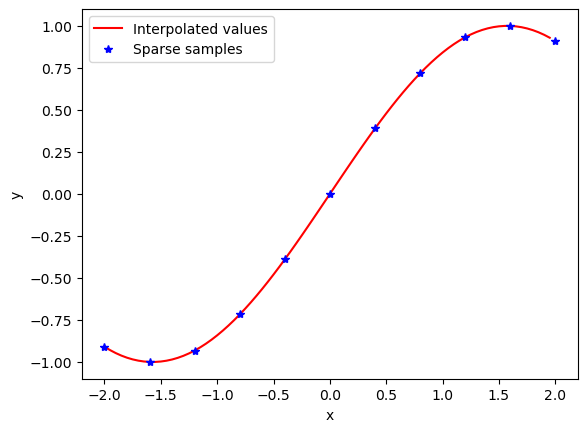

In [3]:
import pandas as pd
from matplotlib import pyplot as plt #pyplot ist ein Modul des Pakets Matplotlib
#Alternativ:
#import matplotlib.pyplot as plt
from scipy import interpolate #interpolate ist ein Modul des Pakets Scipy (nicht eine Funktion)
import numpy as np

# Einlesen der Daten-Samples x,y, wobei f(x)=y
data = pd.read_csv("Lektion_6_Daten.csv")

print("Erste fünf Zeilen:")
print(data.head()) # Standardargument des Zeilen-Parameters ist 5
print("Erste fünf Zeilen:")
print(data.head(10))


# Extrahiere die x- und y-Werte aus dem DataFrame. Die Spalten werden nach den Labels gewählt.
# Die Doppelpunkte zeigen an, dass alle Zeilen extrahiert werden sollen
x = data.loc[:,"x"]
y = data.loc[:,"y"]
# Alternativ:
#x = df["x"]
#y = df["y"]

# Interpoliere die Daten
# Generiere die Interpolationsfunktion aus den vorhandenen Daten und der Angabe der Interpolationsart (hier: cubic spline)
interpolation_func = interpolate.interp1d(x, y, "cubic")
# Generiere "dichte" Stützstellen (x-Werte) für die Interpolation, 
# also Werte zwischen den eingelesenen Samples (Schrittweite 0.05)
x_interp = np.arange(x.min(), x.max(), 0.05)
# Alternativ
#x_interp = np.linspace(x.min(), x.max(), 50) #erzeuge 50 gleichverteilte Samples zwischen min und max
# Berechne die interpolierten Funktionswerte an den Stützstellen
y_interp = interpolation_func(x_interp)

# Plotte die Daten
plt.figure()
# Interpolierte Werte und Samples aus der Datei werden mit unterschiedlichen Farben/Zeichen in einem Plot dargestellt
plt.plot(x_interp, y_interp, "-r", x, y ,"*b")
# Die Reihenfolge der Labels in der Legende muss der Reihenfolge der Argumente der Plot-Funktion entsprechen
plt.legend(["Interpolated values", "Sparse samples"])
# Alternativ könnte man auch die labels innerhalb der Funktion plot als Argumente mitgeben
#plt.plot(x, y, 'o', label='Eingelesene Daten')
#plt.plot(x_interp, y_interp, label='Interpolierte Daten')
#plt.legend()

plt.xlabel('x')
plt.ylabel('y')

# Diese Funktion wird benötigt, damit der Plot tatsächlich angezeigt wird
plt.show()

Der folgende Code wurde zur Erstellung der CSV-Datei verwendet

In [15]:
import numpy
import pandas
x = numpy.arange(-2,2.4,0.4)
y = numpy.sin(x)
df = pandas.DataFrame({"x":x, "y":y})
# index=False verhindert, dass eine Indexspalte in die CSV-Datei geschrieben wird
df.to_csv("out.csv", index=False)